<a href="https://colab.research.google.com/github/MangalaPriyadharshini/MangalaPriyadharshini/blob/main/DeepLearningImageClassficationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import zipfile, os

zip_path = "/content/archive (13).zip"   # your uploaded file
extract_path = "/content/data"               # where to unzip

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['cats_set', 'dogs_set']


In [4]:
dataset_path =r"/content/data"

In [9]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),   # resize all images to 64x64 (must match input_shape in CNN)
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [18]:
# CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.5026 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.4684 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6887
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.5201 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5423 - loss: 0.6866 - val_accuracy: 0.6500 - val_loss: 0.6670
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.6075 - loss: 0.6638 - val_accuracy: 0.6100 - val_loss: 0.6576
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.6378 - loss: 0.6425 - val_accuracy: 0.5950 - val_loss: 0.6521
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.6893 - loss: 0.5834 - val_accuracy: 0.6200 - val_loss: 0.6669
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.6986 - loss: 0.6083 - val_accuracy: 0

In [27]:
loss, accuracy = model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6169 - loss: 1.4478


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Change this path to a single image inside your dataset
img_path = "/content/CAT"  # Example: update with real image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(64, 64))  # Same size as model input
img_array = image.img_to_array(img) / 255.0           # Normalize (0-1)
img_array = np.expand_dims(img_array, axis=0)         # Add batch dimension

# Predict using trained CNN model
prediction = model.predict(img_array)

# Interpret result
if prediction[0][0] > 0.5:
    print("🐶 Predicted: Dog")
else:
    print("🐱 Predicted: Cat")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🐱 Predicted: Cat


In [29]:
import matplotlib.pyplot as plt

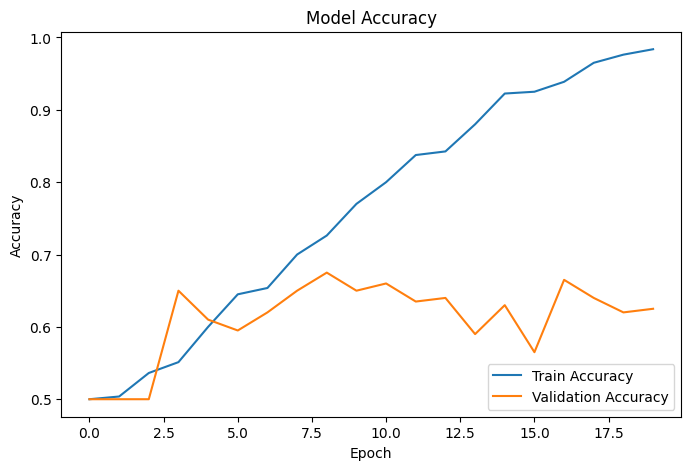

In [30]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

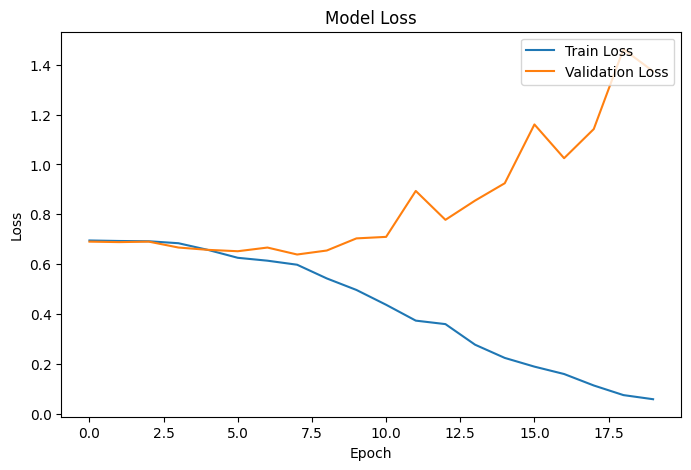

In [31]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()